In [6]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.linear_model import QuantileRegressor
from sklearn.model_selection import train_test_split, ShuffleSplit, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv("50_Startups.csv")
print(df.head(),end='\n\n')
print(df.info(),end='\n\n')
print(df.describe(),end='\n\n')

   R&D Spend  Administration  Marketing Spend     Profit
0  165349.20       136897.80        471784.10  192261.83
1  162597.70       151377.59        443898.53  191792.06
2  153441.51       101145.55        407934.54  191050.39
3  144372.41       118671.85        383199.62  182901.99
4  142107.34        91391.77        366168.42  166187.94

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB
None

           R&D Spend  Administration  Marketing Spend         Profit
count      50.000000       50.000000        50.000000      50.000000
mean    73721.615600   121344.639600    211025.097800  112012.639200
std     45902.256482    28

Feature Values:  {'R&D Spend': 49, 'Administration': 50, 'Marketing Spend': 48, 'Profit': 50}

Categorical Features:  []



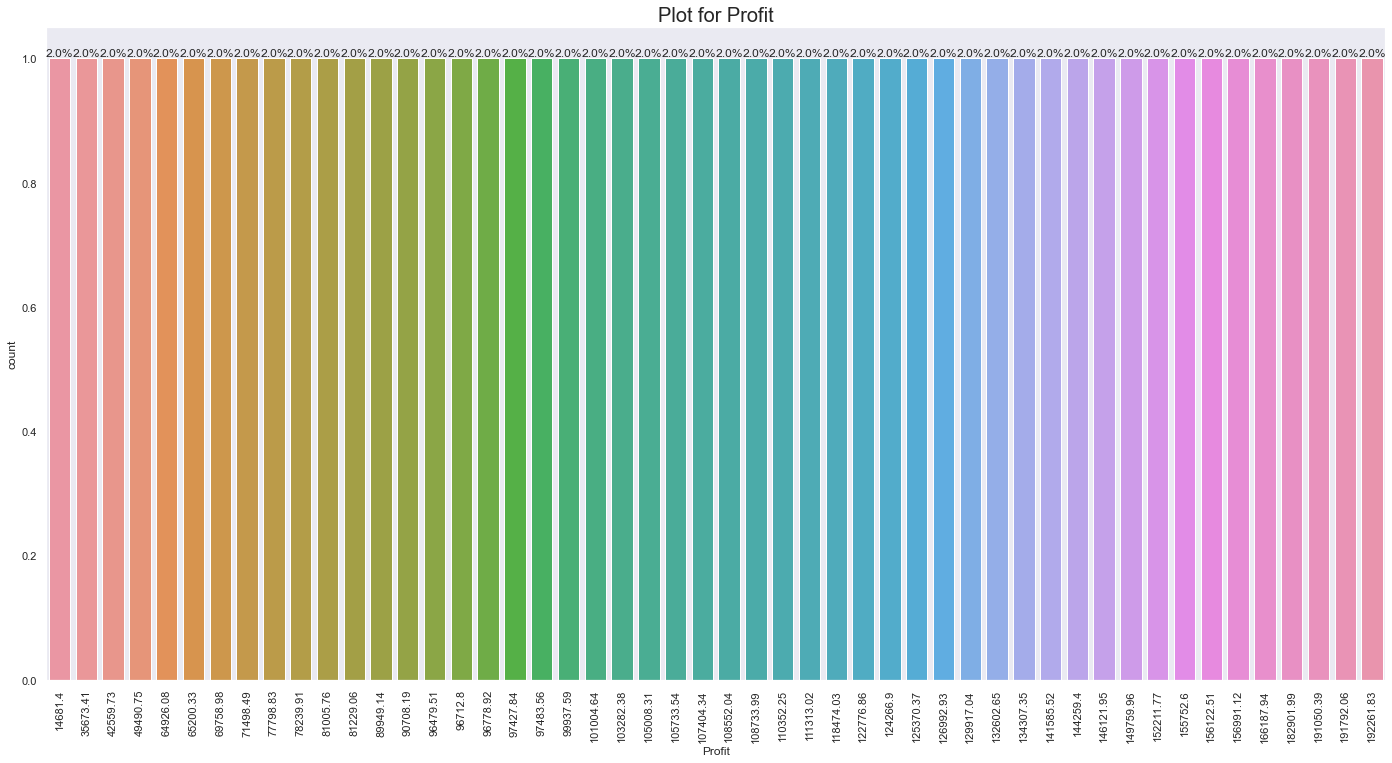

In [8]:
feature_values = {col: df[col].nunique() for col in df.columns}
print("Feature Values: ",feature_values,end='\n\n') #removes all the 0 values; gives you the count of all the non-0 unique vals

categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
print("Categorical Features: ",categorical_features,end='\n\n')

font = {'family': 'serif',
        'color': 'darkred',
        'weight': 'normal',
        'size': 16,
        }

#using Seaborn
sns.set(style="dark")
#sns.set_context("poster")
sns.cubehelix_palette(as_cmap=True)

plt.figure(figsize=(24,12))
total = float(len(df))
ax =sns.countplot(x="Profit", data=df)
plt.xticks(rotation=90)
plt.title("Plot for Profit", fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2.
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center',va='bottom')
plt.show()

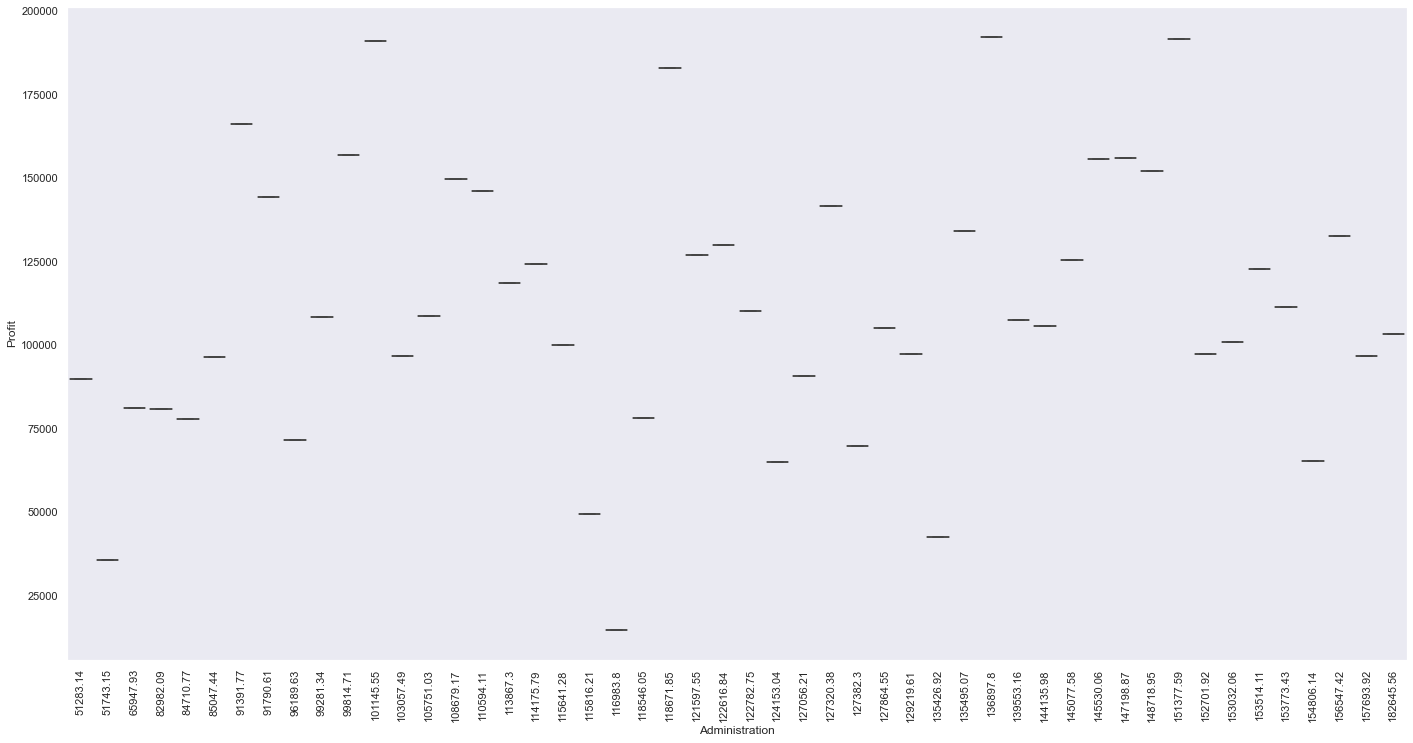

In [9]:
plt.figure(figsize=(24, 12))
fig = sns.boxplot(x='Administration', y="Profit", data=df.sort_values('Profit',ascending=False))
plt.xticks(rotation=90)
plt.show()

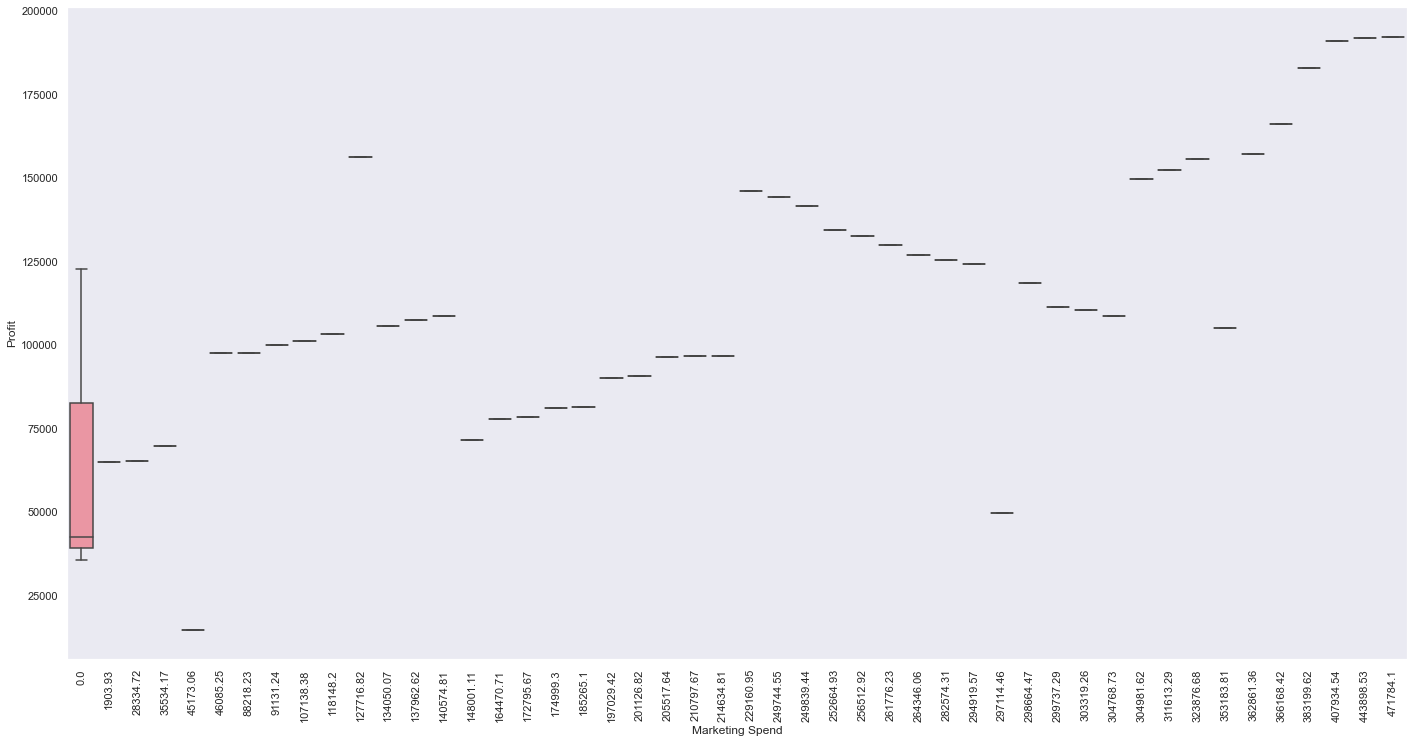

In [10]:
plt.figure(figsize=(24, 12))
fig = sns.boxplot(x='Marketing Spend', y="Profit", data=df.sort_values('Profit',ascending=False))
plt.xticks(rotation=90)
plt.show()

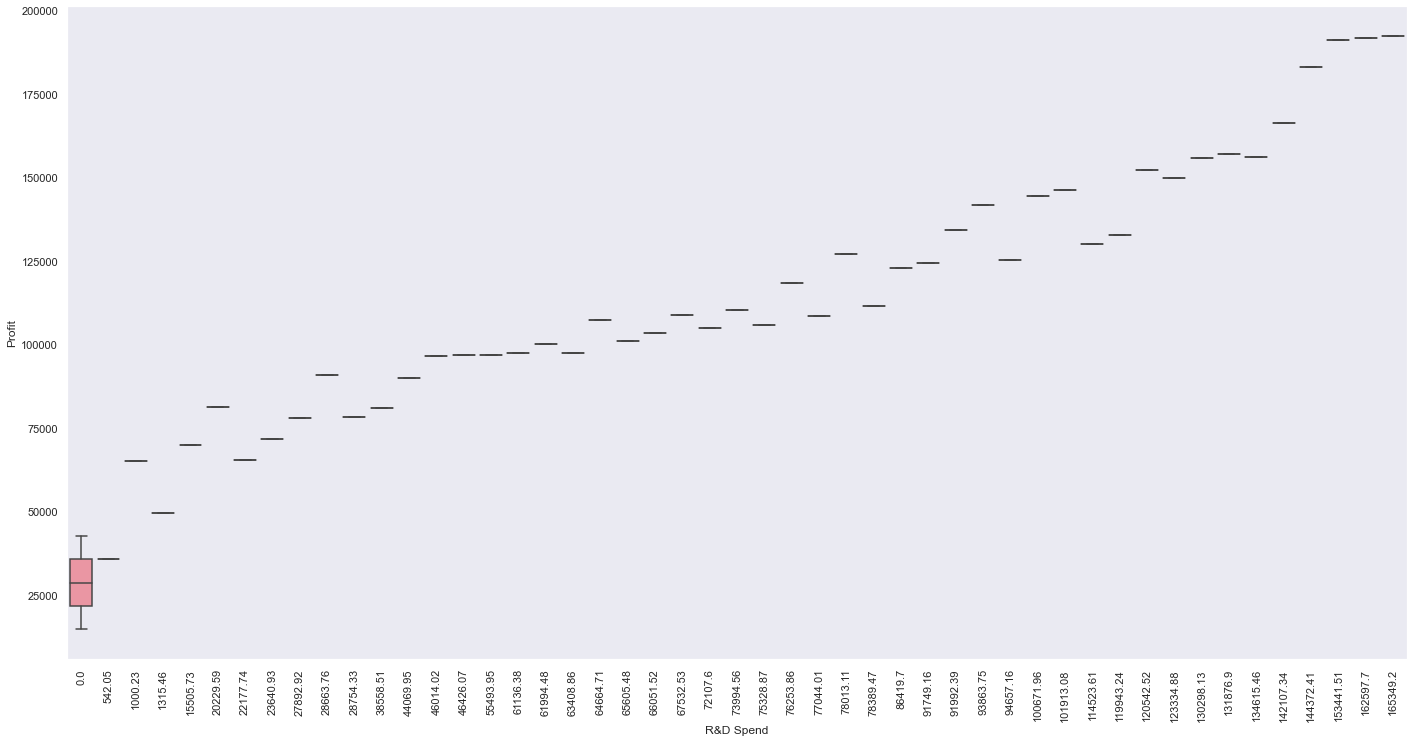

In [11]:
plt.figure(figsize=(24, 12))
fig = sns.boxplot(x='R&D Spend', y="Profit", data=df.sort_values('Profit',ascending=False))
plt.xticks(rotation=90)
plt.show()


Numerical variables:  ['R&D Spend', 'Administration', 'Marketing Spend']

Discrete Variables Count: 0


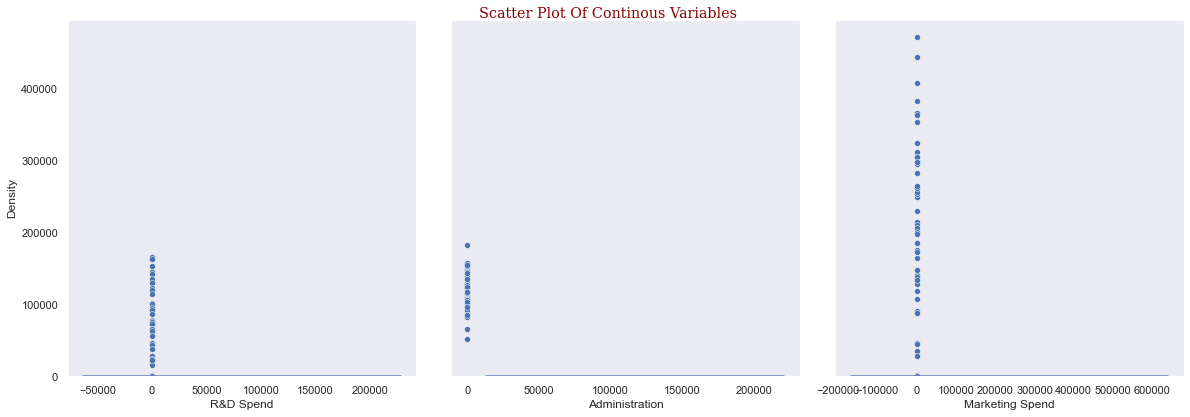

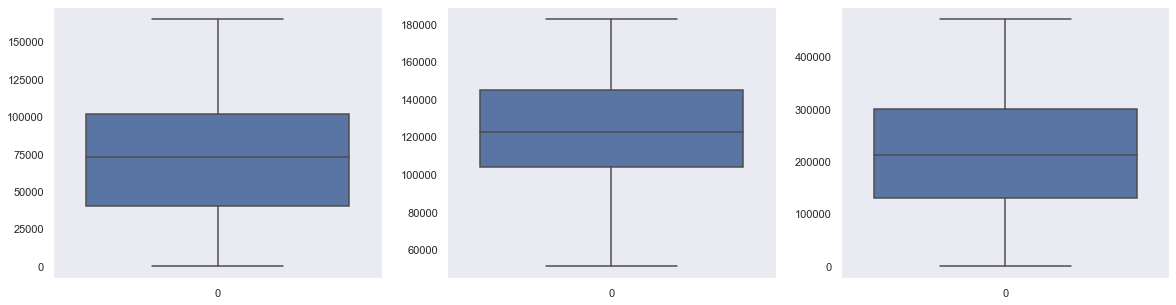

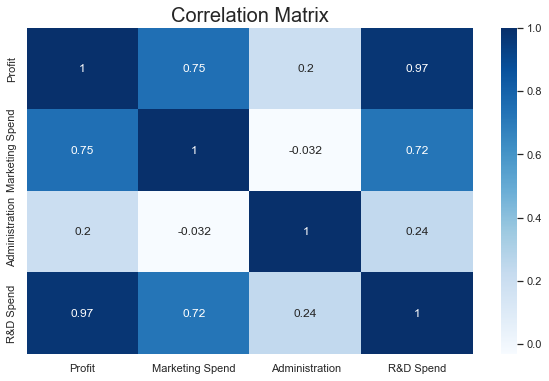

In [12]:
numerical_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (feature not in ['Profit']))]
print('\nNumerical variables: ', numerical_features)

discrete_feature = [feature for feature in numerical_features if df[feature].nunique() < 25]
print("\nDiscrete Variables Count: {}".format(len(discrete_feature)))

continuous_features = [feature for feature in numerical_features if feature not in discrete_feature + ['Profit']]
(continuous_features)

font = {'family': 'serif',
        'color': 'darkred',
        'weight': 'normal',
        'size': 16,
        }
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)
fig.subplots_adjust(wspace=0.1, hspace=0.3)
fig.suptitle('Scatter Plot Of Continous Variables', fontdict=font)
fig.subplots_adjust(top=0.95)

axes = axes.ravel()

for i, col in enumerate(continuous_features):
    # using log transformation
    sns.distplot(df[col], ax=axes[i])

axes = axes.ravel()

for i, col in enumerate(continuous_features):
    x = df[col]
    y = df['Profit']
    sns.scatterplot(x, ax=axes[i])

fig, ax = plt.subplots(1, 3, figsize=(20, 5))
for variable, subplot in zip(numerical_features, ax.flatten()):
    sns.boxplot(df[variable], ax=subplot)

plt.figure(figsize=(10, 6))

#Reversing the Elements
corr_matrix = df.corr()
corr_matrix_reversed = corr_matrix.iloc[::-1, ::-1]

sns.heatmap(corr_matrix_reversed, annot=True, cmap='Blues')
plt.title('Correlation Matrix',fontsize=20)
plt.show()

In [13]:
#Model Selection and Splitting
"""MODEL SELECTION"""
X=df.iloc[:,:3]
y=df.iloc[:,3]

from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.3, random_state=42)

feature_cols = [x for x in train.columns if x != 'Profit']
X_train = train[feature_cols]
y_train = train['Profit']

X_test  = test[feature_cols]
y_test  = test['Profit']

"Splitting The Data"
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [14]:
#1.Linear Regression


regressor=LinearRegression()
regressor.fit(X_train,y_train)
#y_pred=regressor.predict(X_test)

#Models for the Accuracy of the Data
scoretr=r2_score(y_train,regressor.predict(X_train))
scorets=r2_score(y_test,regressor.predict((X_test)))
msets=mean_squared_error(y_test,regressor.predict(X_test))
msetr=mean_squared_error(y_train,regressor.predict(X_train))
hd1='LINEAR REGRESSION'
hd2='LASSO REGRESSION'
hd3='QUANTILE REGRESSION'
hd4='ELASTIC NET REGRESSION'
hd5='POISSON REGRESSION'
hd6='COMPARING THE MODELS:'
ut1='\x1B[4m'+hd1+'\x1B[0m'
ut2='\x1B[4m'+hd2+'\x1B[0m'
ut3='\x1B[4m'+hd3+'\x1B[0m'
ut4='\x1B[4m'+hd4+'\x1B[0m'
ut5='\x1B[4m'+hd5+'\x1B[0m'
ut6='\x1B[4m'+hd6+'\x1B[0m'

print(ut1)
print('TRAIN:')
print('MSE : '+str(msetr))
print('RMSE : '+str(math.sqrt((msetr))))
print('R2 Score : '+str(scoretr))
print('\nTEST:')
print('MSE : '+str(msets))
print('RMSE : '+str(math.sqrt((msets))))
print('R2 Score : '+str(scorets))

LINEAR REGRESSION
TRAIN:
MSE : 77960288.462268
RMSE : 8829.512356991636
R2 Score : 0.9546762374572824

TEST:
MSE : 100604263.51952031
RMSE : 10030.16767155566
R2 Score : 0.9028338938059198


In [15]:
"2.Lasso Regression"

las=Lasso()
las.fit(X_train,y_train)
y_predi=las.predict(X_test)

scoreltr=r2_score(y_train,las.predict(X_train))
scorelts=r2_score(y_test,las.predict(X_test))
mselts=mean_squared_error(y_test,las.predict(X_test))
mseltr=mean_squared_error(y_train,las.predict(X_train))
print('\n')
print(ut2)
print('TRAIN:')
print('MSE : '+str(mseltr))
print('RMSE : '+str(math.sqrt((mseltr))))
print('R2 Score : '+str(scoreltr))
print('\nTEST:')
print('MSE : '+str(mselts))
print('RMSE : '+str(math.sqrt((mselts))))
print('R2 Score : '+str(scorelts))



LASSO REGRESSION
TRAIN:
MSE : 77960288.46226797
RMSE : 8829.512356991634
R2 Score : 0.9546762374572824

TEST:
MSE : 100604263.66351935
RMSE : 10030.167678733958
R2 Score : 0.902833893666842


In [16]:
#3.Quantile Regression

qr=QuantileRegressor()
qr.fit(X_train,y_train)
y_predic=qr.predict(X_test)

scoreqrtr=r2_score(y_train,qr.predict(X_train))
scoreqrts=r2_score(y_test,qr.predict(X_test))
mseqrts=mean_squared_error(y_test,qr.predict(X_test))
mseqrtr=mean_squared_error(y_train,qr.predict(X_train))
print('\n')
print(ut3)
print('TRAIN:')
print('MSE : '+str(mseqrtr))
print('RMSE : '+str(math.sqrt((mseqrtr))))
print('R2 Score : '+str(scoreqrtr))
print('\nTEST:')
print('MSE : '+str(mseqrts))
print('RMSE : '+str(math.sqrt((mseqrts))))
print('R2 Score : '+str(scoreqrts))
print('\n')



QUANTILE REGRESSION
TRAIN:
MSE : 83481261.47998042
RMSE : 9136.808057520986
R2 Score : 0.9514665101076887

TEST:
MSE : 100581980.39082275
RMSE : 10029.056804646325
R2 Score : 0.902855415407228




In [17]:
# 4.Elastic Net

from sklearn.linear_model import ElasticNet


qr=ElasticNet()
qr.fit(X_train,y_train)
y_predic=qr.predict(X_train)
scoreenr=r2_score(y_train,qr.predict(X_train))
scoreens=r2_score(y_test,qr.predict(X_test))
mseqrts=mean_squared_error(y_test,qr.predict(X_test))
mseqrtr=mean_squared_error(y_train,qr.predict(X_train))
print('\n')
print(ut4)
print('TRAIN:')
print('MSE : '+str(mseqrtr))
print('RMSE : '+str(math.sqrt((mseqrtr))))
print('R2 Score : '+str(scoreenr))
print('\nTEST:')
print('MSE : '+str(mseqrts))
print('RMSE : '+str(math.sqrt((mseqrts))))
print('R2 Score : '+str(scoreens))
print('\n')




ELASTIC NET REGRESSION
TRAIN:
MSE : 77960288.46226797
RMSE : 8829.512356991634
R2 Score : 0.9546762374572824

TEST:
MSE : 100604263.45499422
RMSE : 10030.16766833906
R2 Score : 0.9028338938682408




In [18]:
#5.Poisson Regressor

from sklearn.linear_model import PoissonRegressor
pr=PoissonRegressor()
pr.fit(X_train,y_train)
y_predic=pr.predict(X_train)

scoreprtr=r2_score(y_train,pr.predict(X_train))
scoreprts=r2_score(y_test,pr.predict(X_test))
mseprts=mean_squared_error(y_test,qr.predict(X_test))
mseprtr=mean_squared_error(y_train,pr.predict(X_train))

print('\n')
print(ut5)
print('TRAIN:')
print('MSE : '+str(mseqrtr))
print('RMSE : '+str(math.sqrt((mseqrtr))))
print('R2 Score : '+str(scoreqrtr))
print('\nTEST:')
print('MSE : '+str(mseqrts))
print('RMSE : '+str(math.sqrt((mseqrts))))
print('R2 Score : '+str(scoreqrts))
print('\n')





POISSON REGRESSION
TRAIN:
MSE : 77960288.46226797
RMSE : 8829.512356991634
R2 Score : 0.9514665101076887

TEST:
MSE : 100604263.45499422
RMSE : 10030.16766833906
R2 Score : 0.902855415407228




In [20]:
print(ut6)
from tabulate import tabulate
md=[['Linear Regression',msetr,math.sqrt(msetr),scoretr],['Lasso Regression',mseltr,math.sqrt(mseltr),scoreltr],['Quantile Reression',mseqrtr,math.sqrt(mseqrtr),scoreqrtr],['Elastic Net Regression',mseqrtr,math.sqrt(mseqrtr),scoreenr],['Poisson Regression',mseprtr,math.sqrt(mseprtr),scoreprtr]]
head=['Model Name','MSE','RMSE','R2']
print(tabulate(md,headers=head,tablefmt='grid'))

COMPARING THE MODELS:
+------------------------+-------------+----------+-------------+
| Model Name             |         MSE |     RMSE |          R2 |
+========================+=============+==========+=============+
| Linear Regression      | 7.79603e+07 |  8829.51 | 0.954676    |
+------------------------+-------------+----------+-------------+
| Lasso Regression       | 7.79603e+07 |  8829.51 | 0.954676    |
+------------------------+-------------+----------+-------------+
| Quantile Reression     | 7.79603e+07 |  8829.51 | 0.951467    |
+------------------------+-------------+----------+-------------+
| Elastic Net Regression | 7.79603e+07 |  8829.51 | 0.954676    |
+------------------------+-------------+----------+-------------+
| Poisson Regression     | 1.72008e+09 | 41473.8  | 2.22045e-16 |
+------------------------+-------------+----------+-------------+


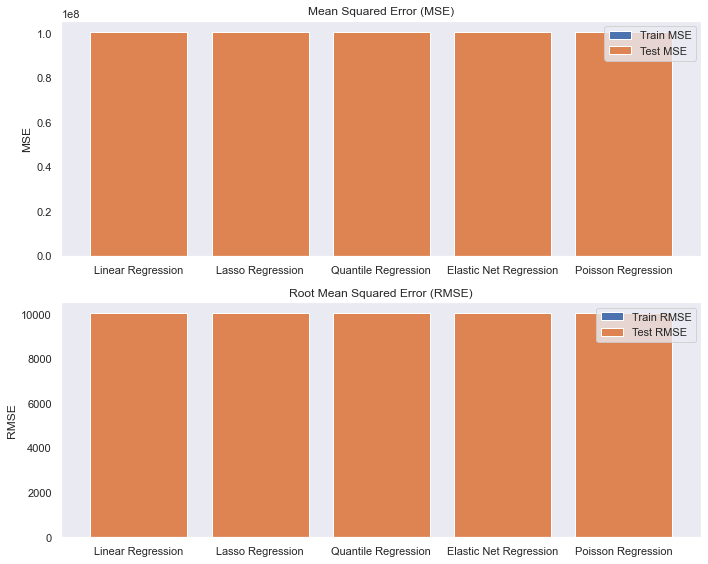

In [21]:
import matplotlib.pyplot as plt

# Define the algorithms and their respective metrics
algorithms = [
    'Linear Regression',
    'Lasso Regression',
    'Quantile Regression',
    'Elastic Net Regression',
    'Poisson Regression'
]

train_mse = [
    77960288.462268,
    77960288.46226797,
    83481261.47998042,
    77960288.46226797,
    77960288.46226797
]

test_mse = [
    100604263.51952031,
    100604263.66351935,
    100581980.39082275,
    100604263.45499422,
    100604263.45499422
]

train_rmse = [
    8829.512356991636,
    8829.512356991634,
    9136.808057520986,
    8829.512356991634,
    8829.512356991634
]

test_rmse = [
    10030.16767155566,
    10030.167678733958,
    10029.056804646325,
    10030.16766833906,
    10030.16766833906
]

# Create subplots for MSE and RMSE
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plot MSE
ax1.bar(algorithms, train_mse, label='Train MSE')
ax1.bar(algorithms, test_mse, label='Test MSE')
ax1.set_ylabel('MSE')
ax1.set_title('Mean Squared Error (MSE)')
ax1.legend()

# Plot RMSE
ax2.bar(algorithms, train_rmse, label='Train RMSE')
ax2.bar(algorithms, test_rmse, label='Test RMSE')
ax2.set_ylabel('RMSE')
ax2.set_title('Root Mean Squared Error (RMSE)')
ax2.legend()

# Adjust spacing between subplots
plt.tight_layout()

# Display the chart
plt.show()

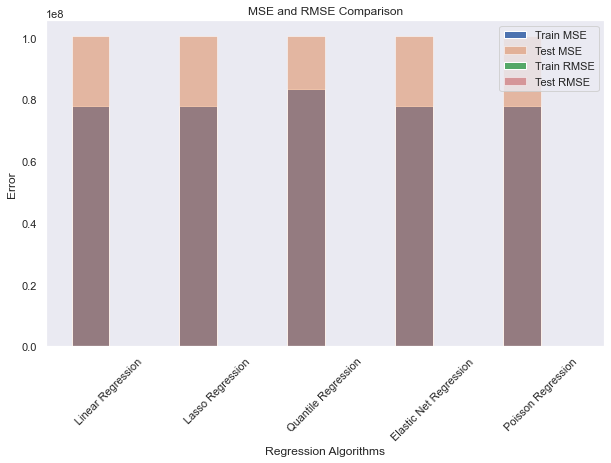

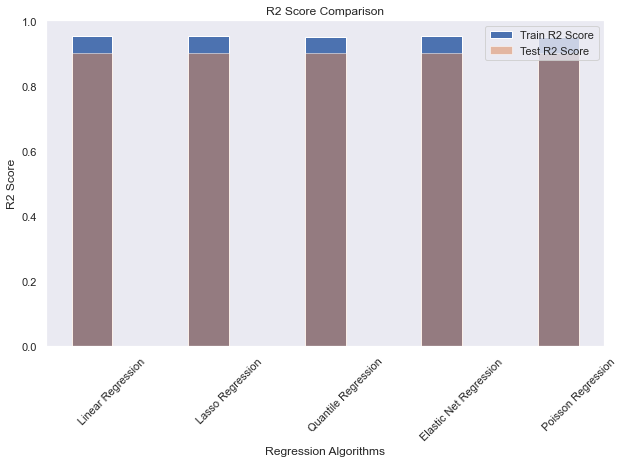

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Define the algorithms and their respective metrics
algorithms = [
    'Linear Regression',
    'Lasso Regression',
    'Quantile Regression',
    'Elastic Net Regression',
    'Poisson Regression'
]

train_mse = [
    77960288.462268,
    77960288.46226797,
    83481261.47998042,
    77960288.46226797,
    77960288.46226797
]

test_mse = [
    100604263.51952031,
    100604263.66351935,
    100581980.39082275,
    100604263.45499422,
    100604263.45499422
]

train_rmse = [
    8829.512356991636,
    8829.512356991634,
    9136.808057520986,
    8829.512356991634,
    8829.512356991634
]

test_rmse = [
    10030.16767155566,
    10030.167678733958,
    10029.056804646325,
    10030.16766833906,
    10030.16766833906
]

train_r2_score = [
    0.9546762374572824,
    0.9546762374572824,
    0.9514665101076887,
    0.9546762374572824,
    0.9514665101076887
]

test_r2_score = [
    0.9028338938059198,
    0.902833893666842,
    0.902855415407228,
    0.9028338938682408,
    0.902855415407228
]

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
r1 = np.arange(len(algorithms))
r2 = [x + bar_width for x in r1]

# Create the grouped bar chart
plt.figure(figsize=(10, 6))
plt.bar(r1, train_mse, width=bar_width, label='Train MSE')
plt.bar(r1, test_mse, width=bar_width, label='Test MSE', alpha=0.5)
plt.bar(r2, train_rmse, width=bar_width, label='Train RMSE')
plt.bar(r2, test_rmse, width=bar_width, label='Test RMSE', alpha=0.5)
plt.xlabel('Regression Algorithms')
plt.ylabel('Error')
plt.title('MSE and RMSE Comparison')
plt.xticks([r + bar_width / 2 for r in range(len(algorithms))], algorithms, rotation=45)
plt.legend()

# Display the chart
plt.show()

# Create the grouped bar chart for R2 score
plt.figure(figsize=(10, 6))
plt.bar(r1, train_r2_score, width=bar_width, label='Train R2 Score')
plt.bar(r1, test_r2_score, width=bar_width, label='Test R2 Score', alpha=0.5)
plt.xlabel('Regression Algorithms')
plt.ylabel('R2 Score')
plt.title('R2 Score Comparison')
plt.xticks([r + bar_width / 2 for r in range(len(algorithms))], algorithms, rotation=45)
plt.legend()

# Display
# Display the chart
plt.show()


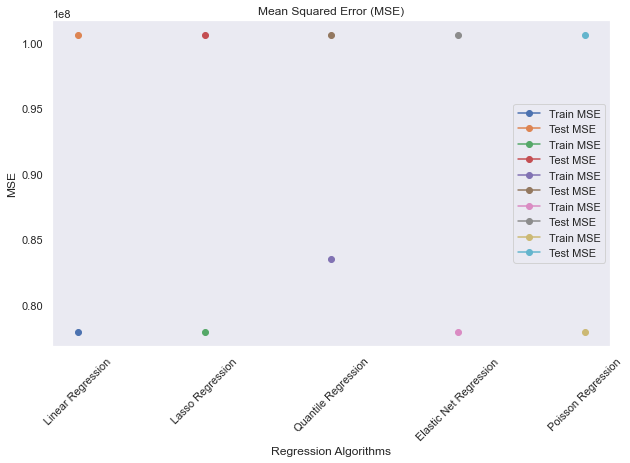

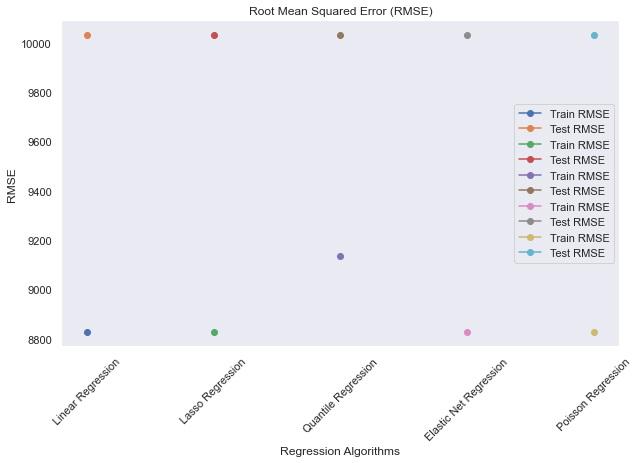

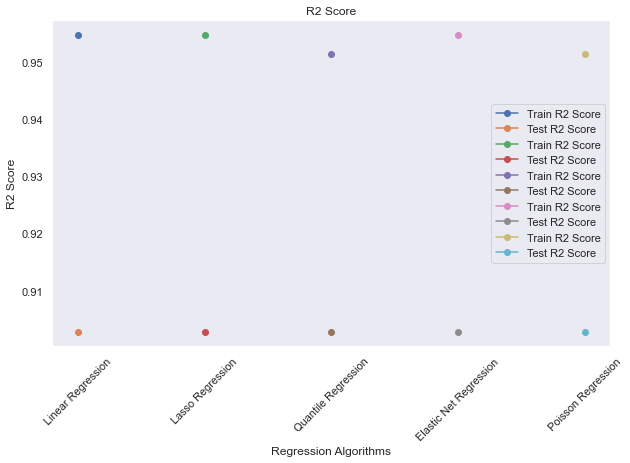

In [26]:
import matplotlib.pyplot as plt

# Define the algorithms and their respective metrics
algorithms = [
    'Linear Regression',
    'Lasso Regression',
    'Quantile Regression',
    'Elastic Net Regression',
    'Poisson Regression'
]

train_mse = [
    77960288.462268,
    77960288.46226797,
    83481261.47998042,
    77960288.46226797,
    77960288.46226797
]

test_mse = [
    100604263.51952031,
    100604263.66351935,
    100581980.39082275,
    100604263.45499422,
    100604263.45499422
]

train_rmse = [
    8829.512356991636,
    8829.512356991634,
    9136.808057520986,
    8829.512356991634,
    8829.512356991634
]

test_rmse = [
    10030.16767155566,
    10030.167678733958,
    10029.056804646325,
    10030.16766833906,
    10030.16766833906
]

train_r2_score = [
    0.9546762374572824,
    0.9546762374572824,
    0.9514665101076887,
    0.9546762374572824,
     0.9514665101076887
]

test_r2_score = [
    0.9028338938059198,
    0.902833893666842,
    0.902855415407228,
    0.9028338938682408,
    0.902855415407228
]

# Create a line plot for MSE
plt.figure(figsize=(10, 6))
for i in range(len(algorithms)):
    plt.plot([algorithms[i]], [train_mse[i]], marker='o', label='Train MSE')
    plt.plot([algorithms[i]], [test_mse[i]], marker='o', label='Test MSE')
plt.xlabel('Regression Algorithms')
plt.ylabel('MSE')
plt.title('Mean Squared Error (MSE)')
plt.legend()
plt.xticks(rotation=45)

# Display the line plot for MSE
plt.show()

# Create a line plot for RMSE
plt.figure(figsize=(10, 6))
for i in range(len(algorithms)):
    plt.plot([algorithms[i]], [train_rmse[i]], marker='o', label='Train RMSE')
    plt.plot([algorithms[i]], [test_rmse[i]], marker='o', label='Test RMSE')
plt.xlabel('Regression Algorithms')
plt.ylabel('RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.legend()
plt.xticks(rotation=45)

# Display the line plot for RMSE
plt.show()

# Create a line plot for R2 Score
plt.figure(figsize=(10, 6))
for i in range(len(algorithms)):
    plt.plot([algorithms[i]], [train_r2_score[i]], marker='o', label='Train R2 Score')
    plt.plot([algorithms[i]], [test_r2_score[i]], marker='o', label='Test R2 Score')
plt.xlabel('Regression Algorithms')
plt.ylabel('R2 Score')
plt.title('R2 Score')
plt.legend()
plt.xticks(rotation=45)

# Display the line plot for R2 Score
plt.show()
